# **Matemáticas para Ciencias de los Datos:Trabajo Práctico 0**

# **Estudiantes**:
*   Diego Ramírez
*   Gabriel Sánchez 
*   José Martínez

## **1. Sistemas lineales**
### **1.1 Ejercicio**

In [ ]:
import torch

def linealFunctionA(x):
  """
  Sample lineal function
  param x: input array
  return y: x + 7
  """
  y = x + 7
  return y

def linealFunctionB(x):
  """
  Sample lineal function
  param x: input array
  return y: x * h
  """
  h= 5
  y = x * h 
  return y

def linealFunctionC(x):
  """
  Sample lineal function max
  param x: input array
  return y: max(x)
  """
  y = torch.max(x)
  return y;

def linealFunctionD(x):
  """
  Sample lineal function max
  param x: input array
  return y: sum(x)
  """
  
  y = torch.sum(x)
  return y

def linealFunctionE(x):
  """
  Sample lineal function absolute value
  param x: input array
  return y: |(x)|
  """
  y = torch.abs(x)
  return y


def checkLinearity(operator):
  
  x = torch.randn(1,50);
  print("x: ", x)
  #create series of values random
  
  
  #samplescalars
  alpha = torch.randn(1,1);
  beta = torch.randn(1,1)
  print("alpha: ",alpha)
  print("beta: ",beta)

  #sample functions
  f1 = lambda x: x + 2
  f2 = lambda x: x * x


  #compute left and right side of the equation
  
  left = operator(alpha * f1(x) + beta * f2(x))  
  right = alpha * operator(f1(x)) + beta * operator(f2(x))

  
  difference = torch.abs(right - left);
  
  
  sumDifference = difference.sum()
  print("right-left diference: ",sumDifference)
  #Is linear?
  return (sumDifference < 0.0001)
  
 

#RESULTS
print("************************* Result x + 7 *****************************")
print("*** Es lineal? x + 7: ", checkLinearity(linealFunctionA)) #FALSE

print("\n")

print("************************* Result x * h *****************************")
print("*** Es lineal? * h: ", checkLinearity(linealFunctionB))  #TRUE

print("\n")

print("************************* Result max(x) *****************************")
print("*** Es lineal? max(x): ", checkLinearity(linealFunctionC)) #TRUE, TRUE Por contraejemplo
# CONTRA EJEMPLO MAX(x)
print("*** ContraEjemplo")
u1 = torch.arange(-3, 5.0, 0.5)
u2 = torch.arange(-2, 6.0, 0.5)
a = torch.tensor([2])
b = torch.tensor([4])
print("u1: ",u1)
print("u2: ",u2)
one =  torch.max((a*u1) + (b*u2))
two = (a*torch.max(u1)) + (b*torch.max(u2))
print("one: ",two)
print("two", two)
difference = torch.abs(two - one);
sumDifference = difference.sum()
print("one-two diference: ",sumDifference)
print(sumDifference < 0.0001)
print("Por lo tanto SI ES LINEAL")

print("\n")

print("************************* Result sum(x) *****************************")
print("*** Es lineal? sum(x) : ", checkLinearity(linealFunctionD))
# CONTRA EJEMPLO sum(x)
print("*** ContraEjemplo")
u1 = torch.arange(-3, 5.0, 0.5)
u2 = torch.arange(-2, 6.0, 0.5)
a = torch.tensor([2])
b = torch.tensor([4])
print("u1: ",u1)
print("u2: ",u2)
one =  torch.sum((a*u1) + (b*u2))
two = (a*torch.sum(u1)) + (b*torch.sum(u2))
print("one: ",two)
print("two", two)
difference = torch.abs(two - one);
sumDifference = difference.sum()
print("one-two diference: ",sumDifference)
print(sumDifference < 0.0001)
print("Por lo tanto SI ES LINEAL")
print("\n")

print("************************* Result |x| *****************************")
print("*** Es lineal? |x| : ", checkLinearity(linealFunctionE)) #FALSE



************************* Result x + 7 *****************************
x:  tensor([[-1.7655,  1.0541, -1.3215, -0.1340,  1.0264, -1.0154,  1.2121, -0.1180,
          0.5141,  0.9711,  0.5800,  0.4100, -0.7016,  1.9806,  0.6507,  0.6911,
         -0.0494,  0.8372,  0.6832,  0.0761, -1.3455,  0.9277,  1.3576,  1.5194,
         -1.2152, -0.4926, -0.0912, -0.0291,  0.5473, -0.3192, -0.1242,  1.6056,
          2.0828,  0.6066, -0.1472, -0.8371, -0.5754, -0.9067, -0.5713, -0.1146,
         -0.5827, -1.0837, -0.3674,  0.6540,  0.3503, -0.4959, -0.4283,  1.5079,
          1.3912,  1.4515]])
alpha:  tensor([[-0.7300]])
beta:  tensor([[-0.5620]])
right-left diference:  tensor(802.1957)
*** Es lineal? x + 7:  tensor(False)


************************* Result x * h *****************************
x:  tensor([[-1.3319, -1.2929,  1.1954,  0.7690, -0.6890, -0.5023,  1.3121, -0.6919,
         -0.6731,  0.0328, -0.6035, -0.2190,  0.8418,  0.2243, -0.5203, -0.6260,
          0.3863, -0.6810,  0.7991, -1.5313

### **1.2 Homogenidad Absoluta, Superposicion de normas L1, L3, L-infinito**

In [ ]:
import torch

def homogenidadAbsoluta(u,a,p):
  # print("**Homogenidad absoluta")
  # print("u:",u)
  # print("aplha:",a)
  # print("p:",p)  

  left = torch.pow( torch.sum(torch.pow(torch.abs(a*u),p)), 1/p)
  right = torch.abs(a) * torch.pow( torch.sum(torch.pow(torch.abs(u),p)), 1/p)

  # print("left:",left)
  # print("right",right)
  
  difference = torch.abs(right - left);
  sumDifference = difference.sum()
  # print("right-left diference: ",sumDifference)
  # Cumple homogenmidad absoluta?
  print("left: {} - right: {} - diference: {}".format(left, right, sumDifference))
  return (sumDifference < 0.0001)

def superposicion(u,v,a,p):
  # print("**Superposicion")
  # print("u:",u)
  # print("v:",v)
  # print("aplha:",a)
  # print("p:",p)  
  left = torch.pow( torch.sum(torch.pow(torch.abs(u+v),p)), 1/p)
  right = torch.pow( torch.sum(torch.pow(torch.abs(u),p)), 1/p) + torch.pow( torch.sum(torch.pow(torch.abs(v),p)), 1/p) 
  # print("left:",left)
  # print("right",right)

  difference = torch.abs(right - left);
  sumDifference = difference.sum()
  # print("right-left diference: ",sumDifference)
  #Cumple superposicion?
  print("left: {} - right: {} - diference: {}".format(left, right, sumDifference))
  return (sumDifference < 0.0001)


# Resultados 
u = torch.randn(50,50)
v = torch.randn(50,50)
a = torch.randn(50)
u1 = torch.arange(1, 6.0, 0.5)
v1 = torch.arange(7, 12.0, 0.5)

print("******************************* Norma L1 *******************************")
p = torch.tensor([1]) 
print("********************** Bilinearidad? **********************")
for i in range(50):
  print("Index {}, cumple homogeneidad absoluta?: {}\n".format(i, homogenidadAbsoluta(u[i],a[i],p)))

print("********************** Superposición? **********************")
for i in range(50):
  print("Index {}, cumple homogeneidad absoluta?: {}\n".format(i, superposicion(u[i],v[i],a[i],p)))
  
print("****Cumple superposicion?:",superposicion(u1,v1,a,p)) #Si, donde u1 y v1 son vectotes donde sus valores son > 0

print("******************************* Norma L3 *******************************")
p = torch.tensor([3]) 
print("********************** Bilinearidad? **********************")
for i in range(50):
  print("Index {}, cumple homogeneidad absoluta?: {}\n".format(i, homogenidadAbsoluta(u[i],a[i],p)))

print("********************** Superposición? **********************")
for i in range(50):
  print("Index {}, cumple homogeneidad absoluta?: {}\n".format(i, superposicion(u[i],v[i],a[i],p)))
  
print("****Cumple superposicion?:",superposicion(u1,v1,a,p)) #Si, donde u1 y v1 son vectotes donde sus valores son > 0

print("******************************* Norma Infinita *******************************")
p = torch.tensor([99]) 
print("********************** Bilinearidad? **********************")
for i in range(50):
  print("Index {}, cumple homogeneidad absoluta?: {}\n".format(i, homogenidadAbsoluta(u[i],a[i],p)))

print("********************** Superposición? **********************")
for i in range(50):
  print("Index {}, cumple homogeneidad absoluta?: {}\n".format(i, superposicion(u[i],v[i],a[i],p)))
  
print("****Cumple superposicion?:",superposicion(u1,v1,a,p)) #Si, donde u1 y v1 son vectotes donde sus valores son > 0



******************************* Norma L1 *******************************
********************** Bilinearidad? **********************
left: tensor([13.7347]) - right: tensor([13.7347]) - diference: 1.9073486328125e-06
Index 0, cumple homogeneidad absoluta?: True

left: tensor([10.9656]) - right: tensor([10.9656]) - diference: 0.0
Index 1, cumple homogeneidad absoluta?: True

left: tensor([27.4160]) - right: tensor([27.4160]) - diference: 1.9073486328125e-06
Index 2, cumple homogeneidad absoluta?: True

left: tensor([101.1727]) - right: tensor([101.1727]) - diference: 7.62939453125e-06
Index 3, cumple homogeneidad absoluta?: True

left: tensor([29.6478]) - right: tensor([29.6478]) - diference: 1.9073486328125e-06
Index 4, cumple homogeneidad absoluta?: True

left: tensor([63.3903]) - right: tensor([63.3903]) - diference: 0.0
Index 5, cumple homogeneidad absoluta?: True

left: tensor([15.8203]) - right: tensor([15.8203]) - diference: 0.0
Index 6, cumple homogeneidad absoluta?: True

left:

## **2. Vectores**

### **2.1.a Grafico de vectores V1, V2, V3**

v1:  tensor([-0.3000,  0.4000,  0.1000])
v2:  tensor([-0.5000,  0.2000,  0.1000])
v3:  tensor([ 0.7071, -0.7071,  0.0000])


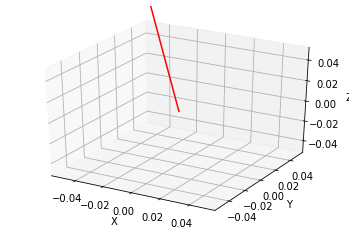

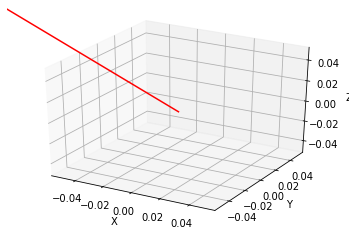

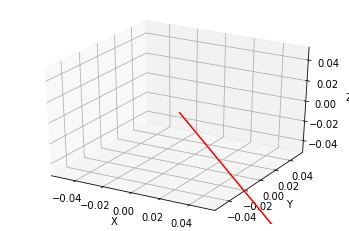

In [ ]:
import math
import torch
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt


def vector3D(v):
  fig = plt.figure()
  ax = plt.axes(projection='3d')

  origin = [0] # origin point
  vector = v.numpy()
  ax.quiver(origin, origin, origin, vector[0], vector[1],vector[2],  normalize = False, color=['r','b','g'])
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  


v1 = torch.tensor([-0.3,0.4,0.1])
print("v1: ",v1)
vector3D(v1)

v2 = torch.tensor([-0.5,0.2,0.1])
print("v2: ",v2)
vector3D(v2)

v3 = torch.tensor([ 1 / math.sqrt(2), -1 / math.sqrt(2), 0 ])
print("v3: ",v3)
vector3D(v3)




### **2.1.b Demuestre cuáles de los vectores anteriores son unitarios3**

In [ ]:
import torch
import math

"""Retorna la norma del vector desarrollando su formula"""
def norma(v):
  print(v)
  norma = torch.sqrt(sum(torch.square(v))) 
  print("Norma : ",norma) 
  #print("Norma .norm pytorch: ",torch.norm(v))
  return norma

vUnitario = torch.tensor([1.0])

v1 = torch.tensor([-0.3,0.4,0.1])
print("v1:")
print("Es v1 Vector Unitario?:", torch.allclose(norma(v1),vUnitario),"\n")

v2 = torch.tensor([-0.5,0.2,0.1])
print("v2:")
print("Es v2 Vector?:", torch.allclose(norma(v2),vUnitario),"\n")

v3 = torch.tensor([ 1 / math.sqrt(2), -1 / math.sqrt(2), 0 ])
print("v3:")
print("Es v3 Vector?:", torch.allclose(norma(v3),vUnitario),"\n")




v1:
tensor([-0.3000,  0.4000,  0.1000])
Norma :  tensor(0.5099)
Es v1 Vector Unitario?: False 

v2:
tensor([-0.5000,  0.2000,  0.1000])
Norma :  tensor(0.5477)
Es v2 Vector?: False 

v3:
tensor([ 0.7071, -0.7071,  0.0000])
Norma :  tensor(1.0000)
Es v3 Vector?: True 



### **2.1.c Calcule el ángulo en grados, entre los vectores v1 y v2, v2 y v3, v1 y v3**

In [ ]:
import torch
import math

"""Retorna la norma del vector desarrollando su formula"""
def norma(v):
  
  norma = torch.sqrt(sum(torch.square(v))) 
  #print("Norma .norm pytorch: ",torch.norm(v))
  return norma


def angle2Vectors(v, w):
  normV = norma(v)
  normW = norma(w)
  angle = torch.arccos(v.dot(w) /  (norma(v) * norma(w)) )
  print ("Angle: ", angle, "=", torch.rad2deg(angle), "grades")

v1 = torch.tensor([-0.3000,  0.4000,  0.1000])
v2 = torch.tensor([-0.5000,  0.2000,  0.1000])
v3 = torch.tensor([ 0.7071, -0.7071,  0.0000])

print("Angulo de v1 y v2")
angle2Vectors(v1,v2)

print("Angulo de v2 y v3")
angle2Vectors(v2,v3)

print("Angulo de v1 y v3")
angle2Vectors(v1,v3)




Angulo de v1 y v2
Angle:  tensor(0.5368) = tensor(30.7577) grades
Angulo de v2 y v3
Angle:  tensor(2.6991) = tensor(154.6482) grades
Angulo de v1 y v3
Angle:  tensor(2.8990) = tensor(166.1021) grades


### **2.1.d Calcule la distancia en L1 L2, y L-infinity entre los vectores v1 y v2, v2 y v3, v1 y v3**

In [ ]:

import torch

# Retorna el resultado de la norma L1
def getNormL1(x,w):
  vDif = x-w
  print("Dif:",vDif)
  normL1 = sum(torch.abs(vDif))
  return normL1

# Retorna el resultado de la norma L1
def getNormL2(x,w):
  vDif = x-w
  print("Dif:",vDif)
  normL2 = torch.sqrt(sum(torch.square(vDif)))
  return normL2

# Retorna el resultado de la norma L3
def getNormL3(x,w):
  vDif = x-w
  print("Dif:",vDif)
  normL3 = torch.sqrt(sum(vDif.pow(3)))
  return normL3

# Retorna el resultado de la norma L-infinito
def getNormInfinity(x,w):
  vDif = x-w
  print("Dif:",vDif)
  Infinity = torch.tensor([99],dtype=torch.float64)
  normInfinity = torch.pow(torch.sum(torch.pow(torch.abs(vDif),Infinity)),1/Infinity)
  return normInfinity

#Results 
v1 = torch.tensor([-0.3000,  0.4000,  0.1000],dtype=torch.float64)
v2 = torch.tensor([-0.5000,  0.2000,  0.1000],dtype=torch.float64)
v3 = torch.tensor([ 0.7071, -0.7071,  0.0000],dtype=torch.float64)

print("v1:",v1)
print("v2:",v1)
print("v3:",v1)

print("\n")

print("********************* Norma L1 de v1 y v2 *********************")
print("Norma L1:",getNormL1(v1,v2))
print("Norma L1:",torch.norm(v1-v2,p=1))
print("********************* Norma L1 de v2 y v3 *********************")
print("Norma L1:",getNormL2(v2,v3))
print("Norma L1:",torch.norm(v2-v3,p=1))
print("********************* Norma L1 de v1 y v3 *********************")
print("Norma L1:",getNormL1(v1,v3))
print("Norma L1:",torch.norm(v1-v3,p=1))

print("\n")

print("********************* Norma L2 de v1 y v2 *********************")
print("Norma L2:",getNormL2(v1,v2))
print("Norma L2:",torch.norm(v1-v2,p=2))
print("Norma L2:",torch.norm(v1-v2))
print("********************* Norma L2 de v2 y v3 *********************")
print("Norma L2:",getNormL2(v2,v3))
print("Norma L2:",torch.norm(v2-v3,p=2))
print("Norma L2:",torch.norm(v2-v3))
print("********************* Norma L2 de v1 y v3 *********************")
print("Norma L2:",getNormL2(v1,v3))
print("Norma L2:",torch.norm(v1-v3,p=2))
print("Norma L2:",torch.norm(v1-v3))

print("\n")

print("********************* Norma L-infinito de v1 y v2 *********************")
print("Norma L-infinito:",getNormInfinity(v1,v2))
print("Norma L-infinito:",torch.norm(v1-v2,p=99))
print("********************* Norma L-infinito de v2 y v3 *********************")
print("Norma L-infinito:",getNormInfinity(v2,v3))
print("Norma L-infinito:",torch.norm(v2-v3,p=99))
print("********************* Norma L-infinito de v1 y v3 *********************")
print("Norma L-infinito:",getNormInfinity(v1,v3))
print("Norma L-infinito:",torch.norm(v1-v3,p=99))




v1: tensor([-0.3000,  0.4000,  0.1000], dtype=torch.float64)
v2: tensor([-0.3000,  0.4000,  0.1000], dtype=torch.float64)
v3: tensor([-0.3000,  0.4000,  0.1000], dtype=torch.float64)


********************* Norma L1 de v1 y v2 *********************
Dif: tensor([0.2000, 0.2000, 0.0000], dtype=torch.float64)
Norma L1: tensor(0.4000, dtype=torch.float64)
Norma L1: tensor(0.4000, dtype=torch.float64)
********************* Norma L1 de v2 y v3 *********************
Dif: tensor([-1.2071,  0.9071,  0.1000], dtype=torch.float64)
Norma L1: tensor(1.5132, dtype=torch.float64)
Norma L1: tensor(2.2142, dtype=torch.float64)
********************* Norma L1 de v1 y v3 *********************
Dif: tensor([-1.0071,  1.1071,  0.1000], dtype=torch.float64)
Norma L1: tensor(2.2142, dtype=torch.float64)
Norma L1: tensor(2.2142, dtype=torch.float64)


********************* Norma L2 de v1 y v2 *********************
Dif: tensor([0.2000, 0.2000, 0.0000], dtype=torch.float64)
Norma L2: tensor(0.2828, dtype=torch.fl

 ### **2.2 Propiedades del producto punto:**

In [ ]:
import torch

#Bilinearidad del producto punto u * (rv + w) = r(u*v + u*w) donde r es un escalar,  u v w vectores
def getBilinaeridadPP(u, v, w, r):
  try:
    # print("u:",u)
    # print("v:",v)
    # print("w:",w)
    # print("r:",r)
    left = u.dot(((r*v) + w))
    right = r * ( (u.dot(v)) + (u.dot(w)) )
      
    difference = torch.abs(right - left);
    sumDifference = difference.sum()
    print("left: {} - right: {} - diference: {}".format(left, right, sumDifference))
    # print("right-left diference: ",sumDifference)
    return (sumDifference < 0.0001)
  except:
    print("Resultado no esta definido")
    return torch.tensor(False)
  
# No asociatividad del producto punto u * (v*w) != (u*v) * w, donde u v w vectores
def getNoAsociatividad(u,v,w):
  try:
    left = u.dot(v.dot(w))
    right = u.dot(v).dot(w)
    difference = torch.abs(right - left);
    sumDifference = difference.sum()
    print("left: {} - right: {} - diference: {}".format(left, right, sumDifference))
    
    return (sumDifference < 0.0001)
  except:
    print("Resultado no esta definido")
    return torch.tensor(False)

# Resultados  
u = torch.randn(50, 50)
v = torch.randn(50, 50)
w = torch.randn(50, 50)
r = torch.randn(50)


print("********************** Bilinearidad? **********************")
for i in range(50):
  print("Index {}, cumple bilinearidad?: {}\n".format(i, getBilinaeridadPP(u[i], v[i], w[i], r[i])))

# print("\n")

print("********************** No asociatividad? **********************")
#FALSE
# print("El producto punto dado el vector u y un escalar|dato por el resultado del\nproducto punto de los vectores v, w| no esta bien definido.\nLo mismo para el producto punto de un escalar|dado por el resultado del producto punto de los vectores u,v|\npor el vector w")
# print(getNoAsociatividad(u,v,w))

for i in range(50):
  print("Index {}, cumple no asociatividad?: {}\n".format(i, getNoAsociatividad(u[i],v[i],w[i])))

********************** Bilinearidad? **********************
left: 0.3097381591796875 - right: -0.011983402073383331 - diference: 0.32172155380249023
Index 0, cumple bilinearidad?: False

left: 23.06561279296875 - right: -36.74386978149414 - diference: 59.80948257446289
Index 1, cumple bilinearidad?: False

left: -15.52184772491455 - right: 1.2445029020309448 - diference: 16.76634979248047
Index 2, cumple bilinearidad?: False

left: 10.313472747802734 - right: 3.558162212371826 - diference: 6.755310535430908
Index 3, cumple bilinearidad?: False

left: 0.09990501403808594 - right: -14.493025779724121 - diference: 14.592930793762207
Index 4, cumple bilinearidad?: False

left: 7.794434070587158 - right: 1.6663074493408203 - diference: 6.128126621246338
Index 5, cumple bilinearidad?: False

left: -12.700048446655273 - right: -9.787149429321289 - diference: 2.9128990173339844
Index 6, cumple bilinearidad?: False

left: -0.293290376663208 - right: -6.633920669555664 - diference: 6.34063053131

## **3. Funciones Multivariable**

### **3.1 Funciones lineales multivariable**

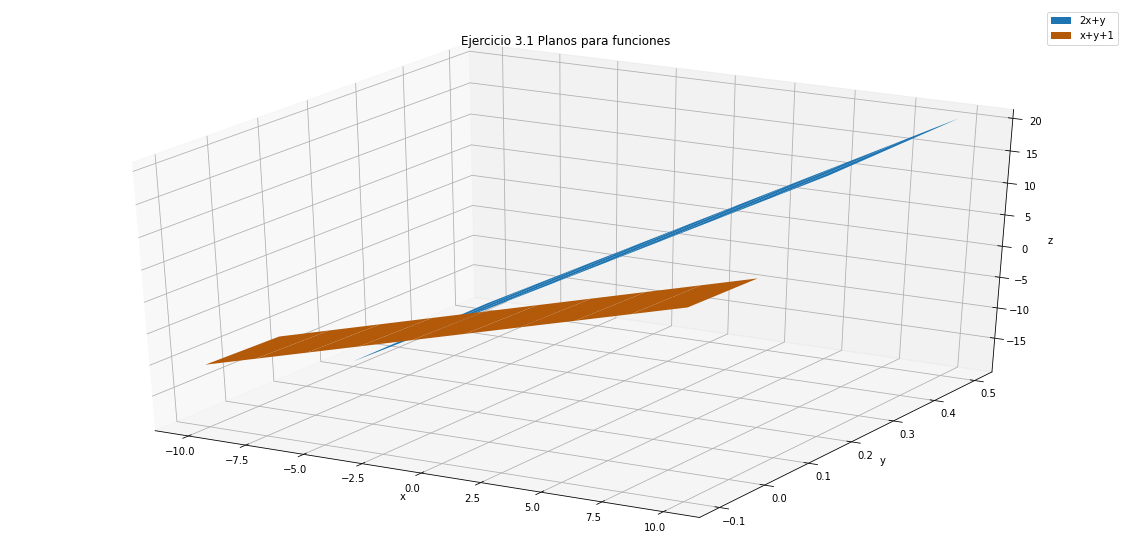

In [ ]:
import torch
import matplotlib.pyplot as plt

def plot_planes():
  """ Se """
  x = torch.linspace(-10,10,10)

  w1 = torch.tensor([0.5,0.2])
  w2 = torch.tensor([-0.1,0.05])

  X1,Y1 = torch.meshgrid(x,w1)
  Z1 = 2*X1+Y1

  X2,Y2 = torch.meshgrid(x,w2)
  Z2 = X1+Y1-1

  fig = plt.figure(figsize=(20,10))
  ax = plt.axes(projection='3d')
  plot1 = ax.plot_surface(X1.numpy(), Y1.numpy(), Z1.numpy(), edgecolor='none',label="2x+y")
  plot2 = ax.plot_surface(X2.numpy(), Y2.numpy(), Z2.numpy(), edgecolor='none',label="x+y+1")

  plot1._facecolors2d = plot1._facecolors3d
  plot1._edgecolors2d = plot1._edgecolors3d

  plot2._facecolors2d = plot2._facecolors3d
  plot2._edgecolors2d = plot2._edgecolors3d

  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.set_zlabel("z")
  ax.set_title('Ejercicio 3.1 Planos para funciones')
  ax.legend()
  plt.show()

plot_planes()


### **3.2 El vector gradiente**

**Ejercicio 3.2.a**

Calculo vector gradiente:

$ f(x,y) = x^3y^2+1 $

$ \nabla f = \dfrac{\partial{f}}{\partial{x}} i + \dfrac{\partial{f}}{\partial{y}} j $

$ \nabla f = 3x^2y^2 \ i + 2x^3y \ j$

Matriz Hessiana:

$ M =
\begin{bmatrix}
\dfrac{\partial^2{f}}{\partial{x^2}} & \dfrac{\partial^2{f}}{\partial{x}\partial{y}} \\
\dfrac{\partial^2{f}}{\partial{y}\partial{x}} & \dfrac{\partial^2{f}}{\partial{y^2}}
\end{bmatrix}
= \begin{bmatrix}
6xy^2 & 6x^2 \\
6x^2y & 2x^3
\end{bmatrix}
$


Evaluacion en punto (0,0) -> 0 i + 0 j
Magnitud: 0.0
Evaluacion en punto (7.400000095367432,-6.300000190734863) -> 6520.2734375 i + -5105.82275390625 j
Magnitud: 37.60918426513672


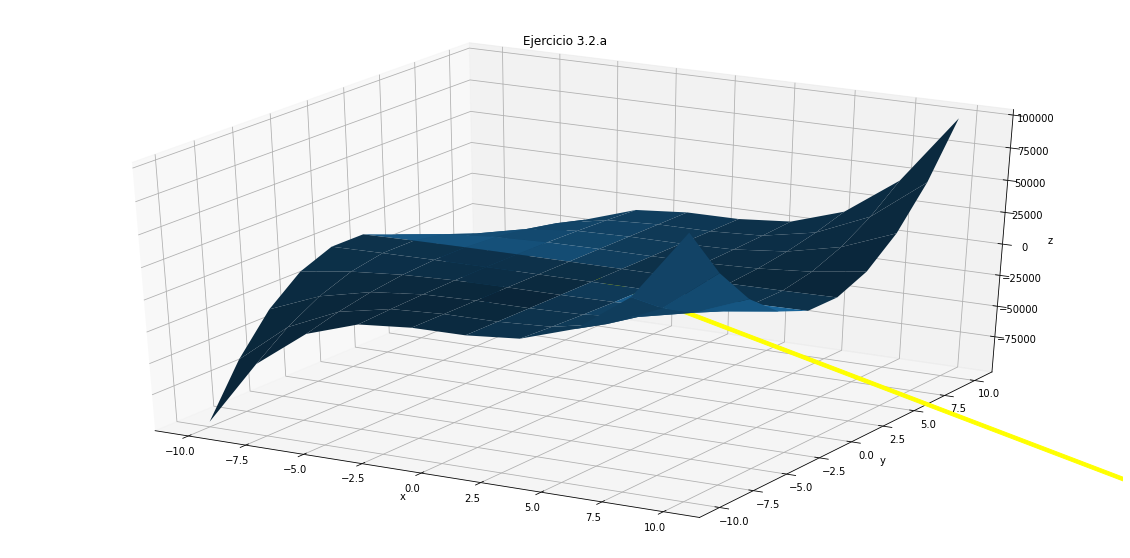

In [2]:
# Evaluacion de puntos
import math 
import torch
import matplotlib.pyplot as plt


def eval_gradient(vector):
    x = vector[0]
    y = vector[1]
    dx = 3*(x**2)*(y**2) 
    dy = 2*(x**3)*y 
    gradient_vector = torch.tensor([dx,dy])
    magnitude = get_magnitude(gradient_vector)
    print("Evaluacion en punto ({},{}) -> {} i + {} j".format(x,y,dx,dy))
    print("Magnitud: {}".format(magnitude))
    return gradient_vector

def get_magnitude(vector):
    return torch.sqrt(torch.sum(vector))


def calculate_gradient():
    origin = torch.tensor([0,0])
    P0 = torch.tensor([0,0])
    P1 = torch.tensor([7.4,-6.3])

    gradient_P0 = eval_gradient(P0)
    gradient_P1 = eval_gradient(P1)

    x = torch.linspace(-10, 10, 10)
    y = torch.linspace(-10, 10, 10)
    x,y = torch.meshgrid(x,y)
    z = (x ** 3)*(y ** 2) + 1

    fig = plt.figure(figsize=(20,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x.numpy(), y.numpy(), z.numpy(), edgecolor='none')
    #ax.arrow(origin[0],origin[1],gradient_P0[0],gradient_P0[1],head_width=0.5,head_length=0.5,color="red");
    ax.arrow(origin[0],origin[1],gradient_P1[0],gradient_P1[1],head_width=0.5,head_length=0.5,color="yellow");

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title('Ejercicio 3.2.a')
    plt.show()

calculate_gradient()

### **Ejercicio 3.2.b**

$ f(x,y) = \sin(x^2) + x\cos(y^3) $

$ \nabla f = \dfrac{\partial{f}}{\partial{x}} i + \dfrac{\partial{f}}{\partial{y}} j $

$ \dfrac{\partial{f}}{\partial{x}}  = \cos(x^2)*2x + \cos(y^3) $

$ \dfrac{\partial{f}}{\partial{y}}  =  -x\sin(y^3)*3y^2$


$ \nabla f = (\cos(x^2)*2x + \cos(y^3)) \ i + (-x\sin(y^3)*3y^2) \ j $

Matriz Hessiana:

$ M =
\begin{bmatrix}
\dfrac{\partial^2{f}}{\partial{x^2}} & \dfrac{\partial^2{f}}{\partial{x}\partial{y}} \\
\dfrac{\partial^2{f}}{\partial{y}\partial{x}} & \dfrac{\partial^2{f}}{\partial{y^2}}
\end{bmatrix}
= \begin{bmatrix}
\cos(x^2)(2x) + \cos(y^3) & -\sin(y^3)(3y^2) \\
\cos(x^2)(2x) - \sin(y^3)(3y^2) & -x(9y^4\cos(y^3) + 18y^3\sin(y^3))
\end{bmatrix}
$


Evaluacion en punto (1.5,-5.5) -> -2.876159191131592 i + 11.711263656616211 j
Magnitud: 2.9723901748657227
Evaluacion en punto (-10,10) -> -16.683998107910156 i + -248.0638427734375 j
Magnitud: nan


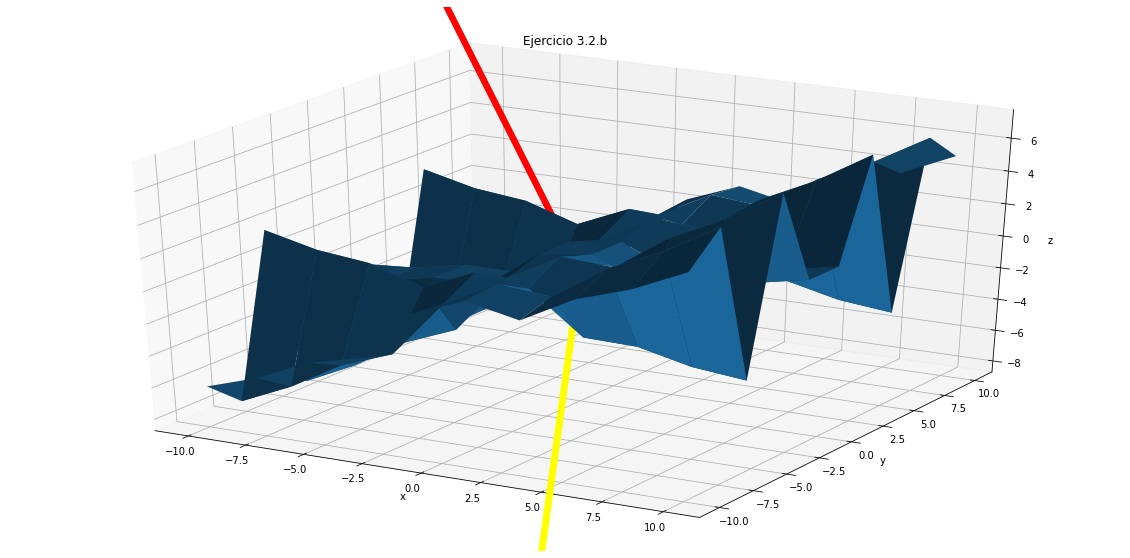

In [3]:
# Evaluacion de puntos
import math 
import torch
import matplotlib.pyplot as plt

def eval_gradient(vector):
    x = vector[0]
    y = vector[1]
    dx = math.cos(x**2)*2*x + math.cos(y**3) 
    dy = -math.sin(y**3)*3*(y**2) 
    gradient_vector = torch.tensor([dx,dy])
    magnitude = get_magnitude(gradient_vector)
    print("Evaluacion en punto ({},{}) -> {} i + {} j".format(x,y,dx,dy))
    print("Magnitud: {}".format(magnitude))
    return gradient_vector

def get_magnitude(vector):
    return torch.sqrt(torch.sum(vector))

def calculate_gradient():
    origin = torch.tensor([0,0])
    P0 = torch.tensor([1.5,-5.5])
    P1 = torch.tensor([-10,10])

    gradient_P0 = eval_gradient(P0)
    gradient_P1 = eval_gradient(P1)

    x = torch.linspace(-10, 10, 10)
    y = torch.linspace(-10, 10, 10)
    x,y = torch.meshgrid(x,y)
    z = torch.sin(x ** 2) + x * torch.cos(y ** 3)

    fig = plt.figure(figsize=(20,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x.numpy(), y.numpy(), z.numpy(), edgecolor='none')
    ax.arrow(origin[0],origin[1],gradient_P0[0],gradient_P0[1],head_width=0.5,head_length=0.5,color="red");
    ax.arrow(origin[0],origin[1],gradient_P1[0],gradient_P1[1],head_width=0.5,head_length=0.5,color="yellow");

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title('Ejercicio 3.2.b')
    plt.show()

calculate_gradient()

### **Ejercicio 3.2.c**

$ f(x,y) = 3^{(2x)} + 5^{(4y)} + 2x + y^4 $

$ \nabla f = \dfrac{\partial{f}}{\partial{x}} i + \dfrac{\partial{f}}{\partial{y}} j $

$ f(x,y) = (3^2)^{x} + (5^4)^{y} + 2x + y^4 $

$ \dfrac{\partial{f}}{\partial{x}} = (3^2)^{x}\ln(3^2) + 2  $

$ \dfrac{\partial{f}}{\partial{y}} = (5^4)^{y}\ln(5^4) + 4y^3 $

$ \nabla f = ((3^2)^{x}\ln(3^2) + 2) \ i + ((5^4)^{y}\ln(5^4) + 4y^3) \ j $


Matriz Hessiana:

$ M =
\begin{bmatrix}
\dfrac{\partial^2{f}}{\partial{x^2}} & \dfrac{\partial^2{f}}{\partial{x}\partial{y}} \\
\dfrac{\partial^2{f}}{\partial{y}\partial{x}} & \dfrac{\partial^2{f}}{\partial{y^2}}
\end{bmatrix}
= \begin{bmatrix}
4(3^{4x})(\ln(3)^2) & 0\\
0 & 8(5^{8y})(\ln(5)^2)
\end{bmatrix}
$


Evaluacion en punto (-4,-2) -> 7.515775680541992 i + 11.872299194335938 j
Magnitud: 4.403189182281494
Evaluacion en punto (-2,9) -> 3.6032700538635254 i + -36.43464660644531 j
Magnitud: nan


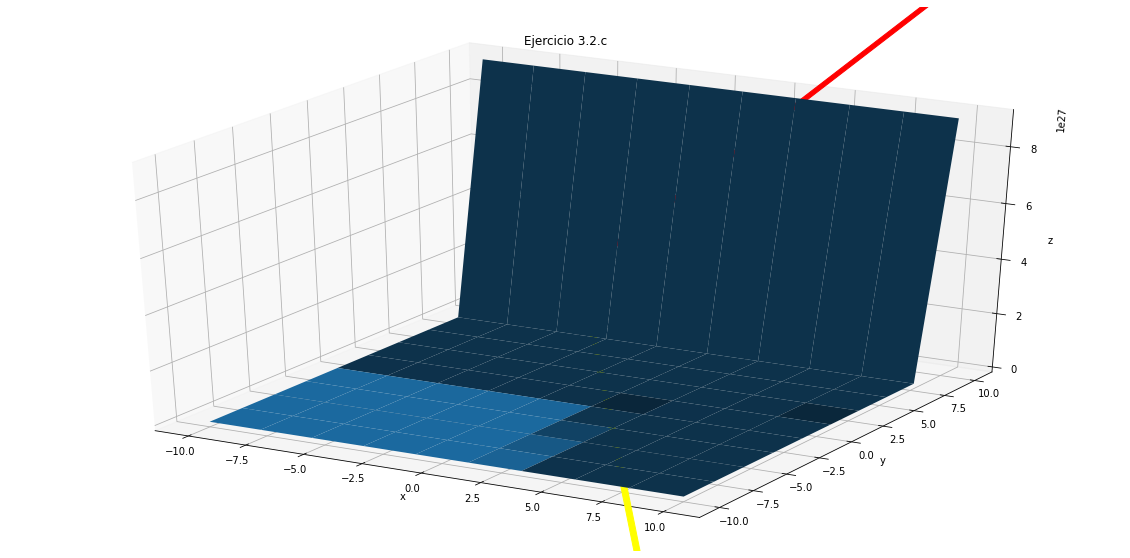

In [ ]:
# Evaluacion de puntos
import math 
import torch
import matplotlib.pyplot as plt

def eval_gradient(vector):
    x = vector[0]
    y = vector[1]
    dx = math.cos(x**2)*2*x + math.cos(y**3) 
    dy = -math.sin(y**3)*3*(y**2) 
    gradient_vector = torch.tensor([dx,dy])
    magnitude = get_magnitude(gradient_vector)
    print("Evaluacion en punto ({},{}) -> {} i + {} j".format(x,y,dx,dy))
    print("Magnitud: {}".format(magnitude))
    return gradient_vector

def get_magnitude(vector):
    return torch.sqrt(torch.sum(vector))

def calculate_gradient():
    origin = torch.tensor([0,0])
    P0 = torch.tensor([-4,-2])
    P1 = torch.tensor([-2,9])

    gradient_P0 = eval_gradient(P0)
    gradient_P1 = eval_gradient(P1)

    x = torch.linspace(-10, 10, 10)
    y = torch.linspace(-10, 10, 10)
    x,y = torch.meshgrid(x,y)
    z = (3 ** (2*x)) + (5 ** (4*y)) + 2*x + (y ** 4)

    fig = plt.figure(figsize=(20,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x.numpy(), y.numpy(), z.numpy(), edgecolor='none')
    ax.arrow(origin[0],origin[1],gradient_P0[0],gradient_P0[1],head_width=0.5,head_length=0.5,color="red");
    ax.arrow(origin[0],origin[1],gradient_P1[0],gradient_P1[1],head_width=0.5,head_length=0.5,color="yellow");

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title('Ejercicio 3.2.c')
    plt.show()

calculate_gradient()

## **4. La distancia de Minkowski como índice de error**

In [ ]:
import torch
import numpy as np

# Calculate MAE
def calculate_mae(u, v, size, print_array=False):
  # Sanity check 
  if (u.shape[0] == v.shape[0] == size):
    mae_array = torch.abs(u-v)
    if print_array:
      print(mae_array)
    return mae_array.sum()/size, torch.std(mae_array)
  else:
    print("Error: Invalid size of input parameters")
    return None 

# Calculate RMSE
def calculate_rmse(u, v, size, print_array=False):
  # Sanity check 
  if (u.shape[0] == v.shape[0] == size):
    rmse_array = (u-v).pow(2)
    if print_array:
      print(rmse_array)
    return torch.sqrt((rmse_array.sum()/size)), torch.std(rmse_array)
  else:
    print("Error: Invalid size of input parameters")
    return None 

# Dataset # 1
M = 10
u = torch.tensor([4, 6, 5, 6, 8, 10, 7, 4, 2, 8], dtype=torch.float32) 
v = torch.tensor([2, 4, 3, 4, 6, 8, 5, 2, 4, 10], dtype=torch.float32)
mae, std_mae = calculate_mae(u, v, M)
rmse, std_rmse = calculate_rmse(u, v, M)
print("\nDataset #1")
print(" - MAE: {} Standard Deviation MAE: {}".format(mae,std_mae))
print(" - RMSE: {} Standard Deviation RMSE: {}".format(rmse,std_rmse))

# Dataset # 2
u = torch.tensor([5, 3, 2, 4, 20, 32, 5, 4, 7, 41], dtype=torch.float32)
v = torch.tensor([4, 2, 3, 5, 21, 29, 2, 7, 4, 38], dtype=torch.float32)
mae, std_mae = calculate_mae(u, v, M)
rmse, std_rmse = calculate_rmse(u, v, M)
print("\nDataset #2")
print(" - MAE: {} Standard Deviation MAE: {}".format(mae,std_mae))
print(" - RMSE: {} Standard Deviation RMSE: {}".format(rmse,std_rmse))

# Dataset # 3
u = torch.tensor([6, 20, 31, 41, 50, 62, 73, 4, 7, 40], dtype=torch.float32)
v = torch.tensor([6, 20, 31, 41, 50, 62, 73, 4, 7, 20], dtype=torch.float32)
mae, std_mae = calculate_mae(u, v, M)
rmse, std_rmse = calculate_rmse(u, v, M)
print("\nDataset #3")
print(" - MAE: {} Standard Deviation MAE: {}".format(mae,std_mae))
print(" - RMSE: {} Standard Deviation RMSE: {}".format(rmse,std_rmse))


Dataset #1
 - MAE: 2.0 Standard Deviation MAE: 0.0
 - RMSE: 2.0 Standard Deviation RMSE: 0.0

Dataset #2
 - MAE: 2.0 Standard Deviation MAE: 1.054092526435852
 - RMSE: 2.2360680103302 Standard Deviation RMSE: 4.216370105743408

Dataset #3
 - MAE: 2.0 Standard Deviation MAE: 6.324555397033691
 - RMSE: 6.324555397033691 Standard Deviation RMSE: 126.49110412597656
